In [1]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# Библиотера Pandas для работы с данными

Библиотека Pandas позволяет открывать таблицы с данными, просматривать их, а также обладает функциями для их анализа.

In [2]:
import pandas as pd

Основной класс для работы с данными в pandas -- это DataFrame.

In [3]:
data = pd.read_csv("data/weight-height.csv")
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
len(data)

10000

In [6]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
data["Gender"].describe()

count      10000
unique         2
top       Female
freq        5000
Name: Gender, dtype: object

In [8]:
data.groupby(data.Gender).describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

In [9]:
data[data["Gender"] == "Female"].head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [10]:
data["height_cm"] = data["Height"]*2.54
data["weight_kg"] = data["Weight"]*0.453592

In [11]:
data = data.drop(["Height", "Weight"], 1)
data.head()

,Gender,height_cm,weight_kg
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [12]:
data["factor"] = data.weight_kg / data.height_cm
data.head()

,Gender,height_cm,weight_kg,factor
0,Male,187.571423,109.720985,0.584956
1,Male,174.706036,73.622732,0.421409
2,Male,188.239668,96.497550,0.512631
3,Male,182.196685,99.809504,0.547812
4,Male,177.499761,93.598619,0.527317


In [13]:
func = lambda x: int(x == "Male")

def func(x): return int(x == "Male")

In [14]:
data["Gender"] = data["Gender"].apply(lambda x: int(x == "Male"))
data.sample(10)

,Gender,height_cm,weight_kg,factor
2085,1,179.901552,89.777357,0.499036
4542,1,178.362984,92.530644,0.518777
8372,0,157.004982,62.295524,0.396774
5318,0,155.193199,53.159524,0.342538
8088,0,166.432425,68.204505,0.409803
7581,0,166.765033,63.930400,0.383356
7421,0,168.909661,65.207482,0.386049
4594,1,182.384123,99.970827,0.548133
8668,0,157.617678,56.643113,0.359370
4226,1,174.118815,89.362636,0.513228


In [15]:
import matplotlib.pyplot as plt

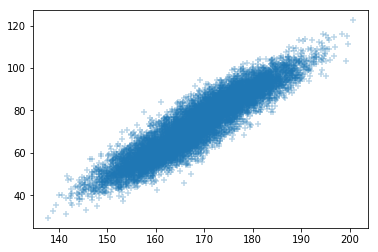

In [16]:
plt.scatter(data.height_cm, data.weight_kg, marker="+", alpha=0.3);

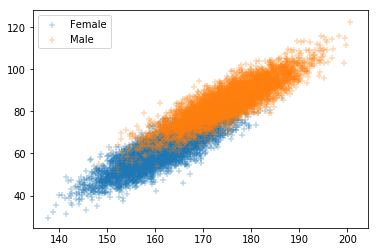

In [17]:
plt.scatter(data.height_cm[data["Gender"] == 0], data.weight_kg[data["Gender"] == 0], marker="+", alpha=0.3, label="Female");
plt.scatter(data.height_cm[data["Gender"] == 1], data.weight_kg[data["Gender"] == 1], marker="+", alpha=0.3, label="Male");
plt.legend()

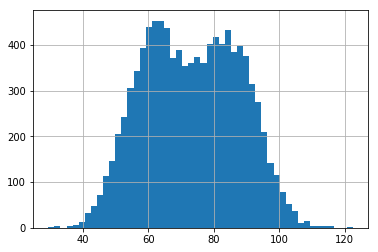

In [24]:
data.weight_kg.hist(bins=50)

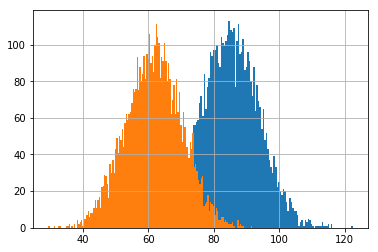

In [23]:
data.weight_kg[data["Gender"] == 1].hist(bins=150)
data.weight_kg[data["Gender"] == 0].hist(bins=150)
